# **Short-term lifecycle and operational analysis of Aadhaar interactions during 2025.**

#Datasets Used

The analysis uses the Aadhaar Demographic Update dataset released by UIDAI, covering the period from March 2025 to December 2025. The dataset contains aggregated demographic update records across India at the state, district, and PIN code levels.

Key variables used include the date of update, geographic identifiers (state, district, pincode), and age-group–wise counts of demographic updates for residents aged 5–17 years and 17 years and above. All data is aggregated and anonymized, and no external datasets were used.

Derived fields such as total demographic updates, adult update ratio, and monthly indicators were created during preprocessing to support temporal and geographic analysis. Only UIDAI-provided datasets were used, in accordance with hackathon guidelines.

#Methodology

The analysis uses the Aadhaar Demographic Update dataset provided by UIDAI for the period March–December 2025. Multiple CSV files were consolidated into a single dataset and validated for schema consistency prior to analysis.

Data cleaning involved standardizing date fields by converting them to a uniform datetime format and extracting derived temporal attributes such as month and year. Geographic identifiers were normalized to address inconsistencies in spelling, casing, and special characters across state and district names, ensuring reliable aggregation at regional levels.

To eliminate duplication at granular levels, records were aggregated at the (date, state, district, pincode) level, with demographic update counts summed accordingly. Demographic count fields were converted to numeric format, and records with missing, negative, or zero total update values were removed to retain only valid update activity.

Feature engineering was performed to support analysis objectives. Total demographic updates were computed as the sum of updates for residents aged 5–17 years and 17 years and above. An adult demographic update ratio was derived to examine lifecycle composition in a scale-independent manner. Age-group fields were used solely to characterize update workflow composition and system load, not to infer demographic behavior.

For analytical purposes, data was aggregated at monthly and state levels to examine temporal trends, geographic variation, and relationships between update volume and lifecycle composition. A relative update intensity metric was additionally computed by comparing each state’s share of national updates against an equal-share baseline, enabling identification of regions with disproportionately high or low update activity.

All preprocessing and analysis steps were implemented using reproducible Python workflows on aggregated, anonymized data, ensuring alignment with UIDAI’s data usage guidelines and the hackathon’s evaluation criteria.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1_demo = pd.read_csv('api_data_aadhar_demographic_0_500000.csv')
df2_demo=pd.read_csv('api_data_aadhar_demographic_500000_1000000.csv')
df3_demo=pd.read_csv('api_data_aadhar_demographic_1000000_1500000.csv')
df4_demo=pd.read_csv('api_data_aadhar_demographic_1500000_2000000.csv')
df5_demo=pd.read_csv('api_data_aadhar_demographic_2000000_2071700.csv')


In [ ]:
print(df1_demo.shape)
print(df2_demo.shape)
print(df3_demo.shape)
print(df4_demo.shape)
print(df5_demo.shape)

(500000, 6)
(500000, 6)
(500000, 6)
(500000, 6)
(71700, 6)


In [ ]:
df_demo = pd.concat([df1_demo, df2_demo, df3_demo, df4_demo, df5_demo], ignore_index=True)
display(df_demo)

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3


In [ ]:
df_demo['date'] = pd.to_datetime(df_demo['date'],dayfirst=True)

df_demo['year'] = df_demo['date'].dt.year
df_demo['month'] = df_demo['date'].dt.month
df_demo['month_name'] = df_demo['date'].dt.strftime('%b')


Dates were parsed using an explicit day-first format to account for non-US date conventions in administrative data.

In [ ]:
df_demo['month_name'].unique()

array(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype=object)

In [ ]:
df_demo['date'].min(), df_demo['date'].max()

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

“The dataset spans March–December 2025, covering a complete administrative cycle except August and the final days of December

Certain months within the study window do not appear in the dataset, reflecting gaps in reported activity rather than data loss. These months were intentionally left unfilled to avoid introducing artificial signals

In [ ]:
print(f"Shape of the merged Demographic DataFrame: {df_demo.shape}")

Shape of the merged Demographic DataFrame: (2071700, 9)


In [ ]:
display(df_demo)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,month_name
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,2025,3,Mar
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,2025,3,Mar
2,2025-03-01,Gujarat,Rajkot,360006,65,765,2025,3,Mar
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,2025,3,Mar
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,2025,3,Mar
...,...,...,...,...,...,...,...,...,...
2071695,2025-12-29,West Bengal,West Midnapore,721212,0,12,2025,12,Dec
2071696,2025-12-29,West Bengal,West Midnapore,721420,0,1,2025,12,Dec
2071697,2025-12-29,West Bengal,West Midnapore,721424,0,5,2025,12,Dec
2071698,2025-12-29,West Bengal,West Midnapore,721426,0,3,2025,12,Dec


#**Data Cleaning**

In [ ]:
df_demo['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli', 'BALANAGAR',
  

Significant administrative name inconsistencies and erroneous non-state entries were present in the raw data. These are resolved through systematic normalization and mapping to official state/UT nomenclature, ensuring analytical validity

In [ ]:
standard_states = {
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chhattisgarh': 'Chhattisgarh',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttaranchal': 'Uttarakhand',
    'uttarakhand': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bengli': 'West Bengal',
    'west bangal': 'West Bengal',
    'delhi': 'Delhi',
    'chandigarh': 'Chandigarh',
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu & kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',
    'lakshadweep': 'Lakshadweep',
    'dadra and nagar haveli and daman and diu':
        'Dadra & Nagar Haveli and Daman & Diu',
    'daman and diu': 'Dadra & Nagar Haveli and Daman & Diu',
    'dadra and nagar haveli': 'Dadra & Nagar Haveli and Daman & Diu'
}

# Normalize
df_demo['state_norm'] = (
    df_demo['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
)

# Map
df_demo['state_clean'] = df_demo['state_norm'].map(standard_states)

# Drop invalid
df_demo = df_demo.dropna(subset=['state_clean']).copy()


In [ ]:
sorted(df_demo['state_clean'].unique())


['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli and Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [ ]:
len(df_demo['state_clean'].unique())

36

**Data preprocessing involved administrative name standardization, removal of erroneous non-state entries, validation of temporal bounds, elimination of zero-activity records, duplicate removal across concatenated files, and enforcement of non-negative numeric integrity**

The raw state field contained non-state values such as cities, districts, and invalid entries. Instead of inferring or remapping these values, a whitelist-based standardization using official state/UT names was applied. Records not matching valid administrative units were excluded to maintain analytical integrity.

In [ ]:
len(df_demo['district'].unique())

974

In [ ]:
df_demo['district_clean'] = (
    df_demo['district']
    .astype(str)
    .str.normalize('NFKD')              # fixes weird unicode
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.replace('*', '', regex=False) # removes asterisk
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)
df_demo['district_clean'] = df_demo['district_clean'].str.title()

In [ ]:
len(df_demo['district_clean'].unique())

932

District names were not standardized due to frequent administrative reorganization. However, obvious encoding artifacts and non-printable characters were removed solely for readability, without altering administrative identity.

Special characters and annotation symbols (e.g., ‘*’) were removed from district labels to improve readability, without altering administrative identifiers.

In [ ]:
df_demo.isna().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0
year,0
month,0
month_name,0
state_norm,0


No missing values were observed in the core analytical fields

In [ ]:
# enforce numeric
df_demo['demo_age_5_17'] = pd.to_numeric(df_demo['demo_age_5_17'], errors='coerce')
df_demo['demo_age_17_'] = pd.to_numeric(df_demo['demo_age_17_'], errors='coerce')

# drop invalid
df_demo = df_demo.dropna(subset=['demo_age_5_17','demo_age_17_'])

# enforce non-negative
df_demo = df_demo[
    (df_demo['demo_age_5_17'] >= 0) &
    (df_demo['demo_age_17_'] >= 0)
]

# remove zero-activity rows
df_demo = df_demo[
    (df_demo['demo_age_5_17'] + df_demo['demo_age_17_']) > 0
]


Numeric fields were coerced to valid non-negative integers, records with zero update activity were excluded, and no imputation or outlier capping was performed to preserve true volumetric signals.

Numeric conversion was applied only to volumetric fields, while administrative identifiers such as pincodes were retained as it is, to preserve referential integrity.

In [ ]:
df_demo

,date,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,month_name,state_norm,state_clean,district_clean
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,2025,3,Mar,uttar pradesh,Uttar Pradesh,Gorakhpur
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,2025,3,Mar,andhra pradesh,Andhra Pradesh,Chittoor
2,2025-03-01,Gujarat,Rajkot,360006,65,765,2025,3,Mar,gujarat,Gujarat,Rajkot
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,2025,3,Mar,andhra pradesh,Andhra Pradesh,Srikakulam
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,2025,3,Mar,rajasthan,Rajasthan,Udaipur
...,...,...,...,...,...,...,...,...,...,...,...,...
2071695,2025-12-29,West Bengal,West Midnapore,721212,0,12,2025,12,Dec,west bengal,West Bengal,West Midnapore
2071696,2025-12-29,West Bengal,West Midnapore,721420,0,1,2025,12,Dec,west bengal,West Bengal,West Midnapore
2071697,2025-12-29,West Bengal,West Midnapore,721424,0,5,2025,12,Dec,west bengal,West Bengal,West Midnapore
2071698,2025-12-29,West Bengal,West Midnapore,721426,0,3,2025,12,Dec,west bengal,West Bengal,West Midnapore


In [ ]:
df_demo.duplicated(
    subset=['date','state_clean','district_clean','pincode']
).sum()


np.int64(485201)

In [ ]:
df_demo = (
    df_demo
    .groupby(['date','state_clean','district_clean','pincode'], as_index=False)
    .agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'
    })
)


In [ ]:
df_demo.duplicated(
    subset=['date','state_clean','district_clean','pincode']
).sum()


np.int64(0)

In [ ]:
df_demo['total_demo'] = (
    df_demo['demo_age_5_17'] +
    df_demo['demo_age_17_']
)


An aggregate total demographic update count was derived to support volumetric comparisons alongside proportional analysis


Aggregate metrics were derived only after resolving duplication and aligning data to the final analysis granularity, ensuring consistency and avoiding redundant recomputation.

In [ ]:
df_demo['adult_demo_ratio'] = (
    df_demo['demo_age_17_'] / df_demo['total_demo']
)


An adult demographic update ratio was derived as the proportion of 17+ age-group updates to total demographic updates, enabling lifecycle composition analysis independent of absolute volume.

In [ ]:
#recreate time features
df_demo['date'] = pd.to_datetime(df_demo['date'], dayfirst=True)

df_demo['year'] = df_demo['date'].dt.year
df_demo['month'] = df_demo['date'].dt.month
df_demo['month_name'] = df_demo['date'].dt.strftime('%b')


As the data was provided in multiple appended files, repeated administrative-day records were observed. These were resolved via aggregation to ensure accurate volumetric representation rather than discarding repeated entries.

Repeated daily administrative records arising from consolidated data files were resolved through aggregation at the date–location level. Temporal features were subsequently re-derived from the date field for monthly analysis.

Numeric month indices were retained for chronological integrity, while month names were preserved solely for interpretability in visualizations.


Although the current dataset spans a single calendar year (2025), the analysis framework explicitly retains the year dimension to ensure methodological generality.

In [ ]:
df_demo

,date,state_clean,district_clean,pincode,demo_age_5_17,demo_age_17_,total_demo,adult_demo_ratio,year,month,month_name
0,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,32,360,392,0.918367,2025,3,Mar
1,2025-03-01,Andaman and Nicobar Islands,North And Middle Andaman,744202,20,402,422,0.952607,2025,3,Mar
2,2025-03-01,Andaman and Nicobar Islands,South Andaman,744101,13,76,89,0.853933,2025,3,Mar
3,2025-03-01,Andaman and Nicobar Islands,South Andaman,744103,25,161,186,0.865591,2025,3,Mar
4,2025-03-01,Andaman and Nicobar Islands,South Andaman,744105,26,171,197,0.868020,2025,3,Mar
...,...,...,...,...,...,...,...,...,...,...,...
1583971,2025-12-29,West Bengal,West Midnapore,721451,0,8,8,1.000000,2025,12,Dec
1583972,2025-12-29,West Bengal,West Midnapore,721457,0,4,4,1.000000,2025,12,Dec
1583973,2025-12-29,West Bengal,West Midnapore,721506,2,5,7,0.714286,2025,12,Dec
1583974,2025-12-29,West Bengal,West Midnapore,721507,0,10,10,1.000000,2025,12,Dec


#The analysis focuses on March–December 2025(except Aug), enabling a detailed examination of short-term lifecycle patterns, operational fluctuations, and regional contrasts within a single administrative cycle.

In [ ]:
df_demo[['demo_age_5_17','demo_age_17_','adult_demo_ratio']].describe()


,demo_age_5_17,demo_age_17_,adult_demo_ratio
count,1.583976e+06,1.583976e+06,1.583976e+06
mean,3.070344e+00,2.805026e+01,8.872172e-01
std,2.197042e+01,1.837303e+02,1.829050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.000000e+00,8.400000e-01
50%,1.000000e+00,7.000000e+00,9.642857e-01
75%,2.000000e+00,1.900000e+01,1.000000e+00
max,5.380000e+03,3.233200e+04,1.000000e+00


In [ ]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583976 entries, 0 to 1583975
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1583976 non-null  datetime64[ns]
 1   state_clean       1583976 non-null  object        
 2   district_clean    1583976 non-null  object        
 3   pincode           1583976 non-null  int64         
 4   demo_age_5_17     1583976 non-null  int64         
 5   demo_age_17_      1583976 non-null  int64         
 6   total_demo        1583976 non-null  int64         
 7   adult_demo_ratio  1583976 non-null  float64       
 8   year              1583976 non-null  int32         
 9   month             1583976 non-null  int32         
 10  month_name        1583976 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(3)
memory usage: 120.8+ MB


In [ ]:
df_analysis = df_demo.copy()
df_analysis = df_analysis.sort_values(
    ['state_clean', 'year', 'month']
).reset_index(drop=True)


In [ ]:
df_analysis.groupby('state_clean')['month'].nunique().describe()


,month
count,36.000000
mean,7.472222
std,1.859126
min,4.000000
25%,5.000000
50%,9.000000
75%,9.000000
max,9.000000


In [ ]:
df_analysis.columns

Index(['date', 'state_clean', 'district_clean', 'pincode', 'demo_age_5_17',
       'demo_age_17_', 'total_demo', 'adult_demo_ratio', 'year', 'month',
       'month_name'],
      dtype='object')

Following data cleaning, the dataset was structured for analysis through sorting, coverage validation, and derivation of aggregate indicators. No further preprocessing or imputation was performed prior to analysis.

Only analytically interpretable derived features were constructed, focusing on volumetric intensity, lifecycle composition, and short-term temporal change. No opaque transformations or model-specific feature engineering was applied.

# National Aadhaar Demographic Updates – Monthly Trend (2025)

How does Aadhaar demographic update activity evolve month-to-month in 2025?

In [ ]:
national_monthly = (
    df_demo
    .groupby(['year','month','month_name'], as_index=False)
    .agg({'total_demo': 'sum'})
    .sort_values(['year','month'])
)


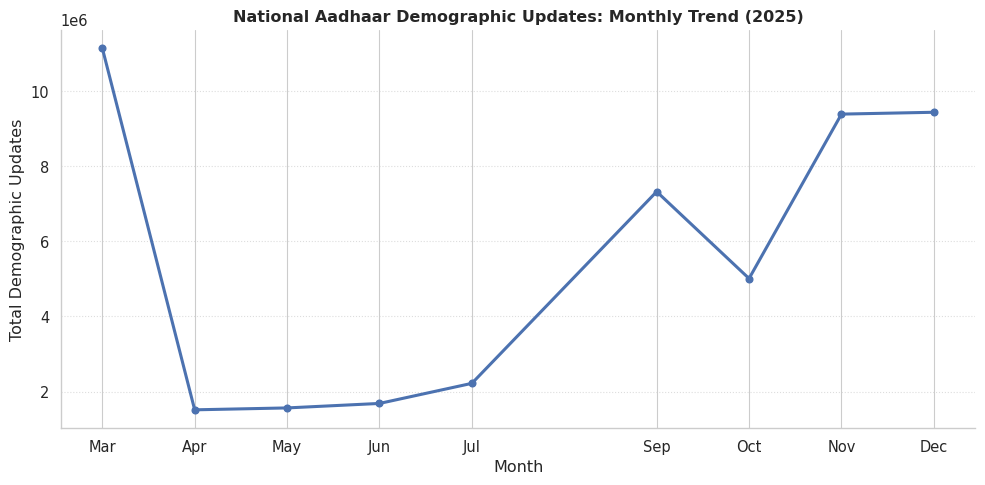

In [ ]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2
)

plt.figure(figsize=(10, 5))

ax = plt.gca()

# Main line
ax.plot(
    national_monthly['month'],
    national_monthly['total_demo'],
    marker='o',
    linewidth=2.2,
    color='#4C72B0'
)

# X-axis ticks
ax.set_xticks(national_monthly['month'])
ax.set_xticklabels(national_monthly['month_name'])

# Labels
ax.set_xlabel('Month')
ax.set_ylabel('Total Demographic Updates')

ax.set_title(
    'National Aadhaar Demographic Updates: Monthly Trend (2025)',
    fontweight='bold'
)
ax.ticklabel_format(style='sci', axis='y', scilimits=(6, 6))

#subtle y-grid only
ax.grid(axis='y', linestyle=':', alpha=0.66)

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


At the national level, Aadhaar demographic updates during March–December 2025 exhibit pronounced month-to-month variability rather than a uniform distribution.

The dataset begins in March 2025, and the initial month may include pent-up or backlog updates carried forward from prior periods. Since no pre-March data is available, this spike is treated as a boundary effect rather than a trend.

1️⃣ What is observed (Pattern / Trend / Anomaly)

The national monthly trend exhibits substantial variability, with sharp peaks and troughs rather than a smooth or steadily increasing pattern. Update activity declines sharply after March, remains relatively subdued during mid-year, and rises again towards the end of the year.

2️⃣ Why it matters (Insight / Indicator)

Such pronounced month-to-month variation indicates that Aadhaar demographic updates are episodic in nature, likely influenced by administrative cycles or time-bound triggers. As a result, monthly update volumes act as a leading indicator of operational demand volatility rather than reflecting stable underlying demand.

3️⃣ What it implies (Interpretation)

The observed temporal concentration implies that demographic update demand is unevenly distributed across the year, creating periods of intensified system load interspersed with relatively low-activity phases. Without advance preparedness, these peaks can place disproportionate pressure on digital infrastructure and service delivery mechanisms.

4️⃣ How decision-making can be supported (Solution Framework)

The findings support the adoption of a temporal readiness and elastic capacity planning framework, wherein historical monthly patterns are leveraged to anticipate periods of elevated demand. Such an approach can inform proactive scaling of system resources, operational staffing, and service availability, thereby improving system resilience and continuity during peak update periods.

# State-wise Share of Adult (17+) Aadhaar Demographic Updates

Are Aadhaar demographic updates predominantly adult-driven across states?

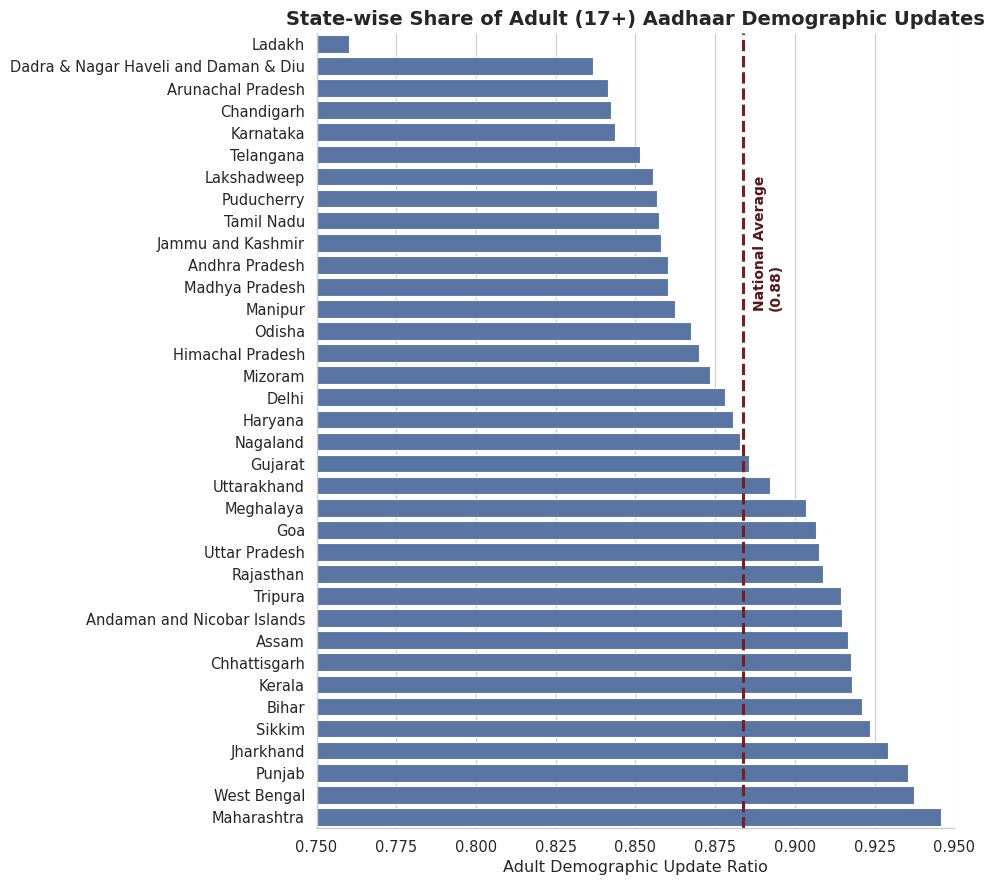

In [ ]:
state_summary = (
    df_demo
    .groupby('state_clean', as_index=False)
    .agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum',
        'total_demo': 'sum'
    })
)

state_summary['adult_demo_ratio'] = (
    state_summary['demo_age_17_'] / state_summary['total_demo']
)


state_summary = state_summary.sort_values('adult_demo_ratio')




sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2
)

avg_ratio = state_summary['adult_demo_ratio'].mean()

plt.figure(figsize=(10, 9))

ax = sns.barplot(
    data=state_summary,
    x='adult_demo_ratio',
    y='state_clean',
    color='#4C72B0'
)

# National average reference line
ax.axvline(
    avg_ratio,
    linestyle='--',
    linewidth=2.2,
    color='#7A1F1F'
)

# Vertical label on the line
ax.text(
    avg_ratio + 0.003,
    len(state_summary) / 4,
    f'National Average\n({avg_ratio:.2f})',
    rotation=90,
    va='center',
    ha='left',
    fontsize=10,
    fontweight='bold',
    color='#5A1515'
)

ax.set_xlabel('Adult Demographic Update Ratio')
ax.set_xlim(0.75, 0.95)

ax.set_ylabel('')
ax.set_title(
    'State-wise Share of Adult (17+) Aadhaar Demographic Updates',
    fontsize=14,
    fontweight='bold'
)

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


State-wise analysis reveals that Aadhaar demographic updates are overwhelmingly adult-driven across all states and Union Territories, with adult update ratios consistently exceeding the child share. While the dominance of adult updates is a nationwide phenomenon, the degree of dominance varies across regions, suggesting differences in lifecycle dynamics, mobility, and update requirements rather than uniform behaviour across the country.

Demographic updates are often triggered by address changes, contact updates, or corrections, which are more frequent among adults due to higher mobility and administrative interactions.

1️⃣ What is observed (Pattern / Trend / Anomaly)

Across all states and Union Territories, adult (17+) updates constitute the dominant share of Aadhaar demographic update activity. The adult update ratios are tightly clustered within a narrow range around a high national average, with only marginal variation across regions.

2️⃣ Why it matters (Insight / Indicator)

The strong clustering of adult update ratios indicates that lifecycle composition of demographic updates is structurally stable across geographies. This suggests that demographic update behaviour is largely uniform nationwide, irrespective of regional differences in population size or administrative scale.

3️⃣ What it implies (Interpretation)

The observed consistency implies that Aadhaar demographic updates are primarily maintenance-driven, reflecting adult residents updating existing information such as address, contact details, or personal identifiers. Variations across states are incremental rather than indicative of fundamentally different lifecycle dynamics.

4️⃣ How decision-making can be supported (Solution Framework)

These findings support a lifecycle-aware service optimization framework, wherein system design and operational focus are aligned with the most frequent update category—adult updates. Prioritizing adult-centric workflows, validation logic, and user interfaces can improve processing efficiency and citizen experience across regions without requiring state-specific lifecycle customization.

#Update Volume vs Lifecycle Composition (State-level

Are high-volume states also high in adult-dominance?

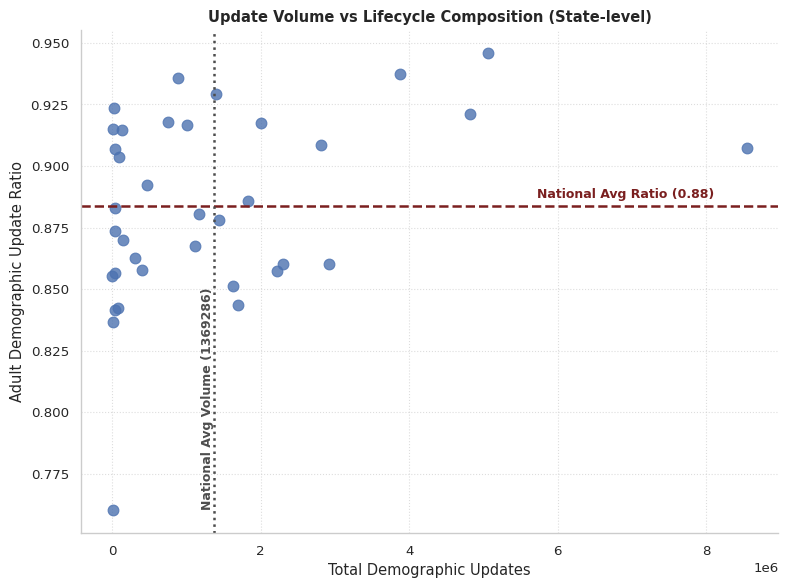

In [ ]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.1
)

plt.figure(figsize=(8, 6))
ax = plt.gca()

# Scatter points (professional muted blue)
ax.scatter(
    state_summary['total_demo'],
    state_summary['adult_demo_ratio'],
    color='#4C72B0',
    alpha=0.8,
    s=60
)

# Reference lines (optional but strong)
avg_volume = state_summary['total_demo'].mean()
avg_ratio = state_summary['adult_demo_ratio'].mean()

ax.axhline(
    avg_ratio,
    linestyle='--',
    linewidth=1.8,
    color='#7A1F1F'
)

ax.axvline(
    avg_volume,
    linestyle=':',
    linewidth=1.8,
    color='#4D4D4D'
)
# Text for average adult ratio (horizontal line)

ax.text(
    state_summary['total_demo'].max() * 0.67,  # push right, away from points
    avg_ratio + 0.002,
    f'National Avg Ratio ({avg_ratio:.2f})',
    color='#7A1F1F',
    fontsize=9,
    fontweight='bold',
    va='bottom'
)


# Text for average volume (vertical line)
ax.text(
    avg_volume,
    state_summary['adult_demo_ratio'].min(),
    f'National Avg Volume ({avg_volume:.0f})',
    color='#4D4D4D',
    fontsize=9,
    fontweight='bold',
    rotation=90,
    va='bottom',
    ha='right'
)


# Labels
ax.set_xlabel('Total Demographic Updates')
ax.set_ylabel('Adult Demographic Update Ratio')

ax.set_title(
    'Update Volume vs Lifecycle Composition (State-level)',
    fontweight='bold'
)

# Axis polish
ax.ticklabel_format(style='sci', axis='x', scilimits=(6, 6))
ax.grid(axis='both', linestyle=':', alpha=0.66)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


HOW TO INTERPRET

This creates four quadrants:

High volume + high ratio → mature, stable systems

High volume + lower ratio → active child lifecycle updates

Low volume + high ratio → maintenance-dominated regions

Low volume + low ratio → sparse but diverse updates


The state-level relationship between demographic update volume and lifecycle composition shows substantial variation in total updates across states, while adult update ratios remain tightly clustered around the national average. This indicates that higher administrative volume does not necessarily correspond to greater lifecycle diversity, pointing to distinct operational profiles rather than uniform update behaviour across regions.

The analysis reveals that Aadhaar demographic updates are predominantly adult-driven across all regions, with lifecycle composition remaining tightly clustered around the national average despite wide variation in update volumes. Monthly trends indicate episodic surges rather than uniform activity, highlighting the need for elastic operational planning. State-level comparisons further show that administrative load and lifecycle diversity are weakly coupled, suggesting that capacity planning should be volume-driven rather than demography-driven. These findings support targeted system optimization, lifecycle-aware service design, and proactive temporal readiness strategies for improved Aadhaar service delivery.


1️⃣ What is observed (Pattern / Trend / Anomaly)

The scatter plot shows substantial variation in total demographic update volumes across states, while adult update ratios remain tightly clustered around the national average. States with both high and low update volumes exhibit similar lifecycle composition, with no clear monotonic relationship between volume and adult update share.

2️⃣ Why it matters (Insight / Indicator)

The absence of a strong relationship between update volume and lifecycle composition indicates that administrative load is not a reliable indicator of demographic update diversity. This weak coupling serves as an important indicator that changes in transaction volume do not necessarily reflect shifts in underlying demographic behavior.

3️⃣ What it implies (Interpretation)

The observed pattern implies that higher update volumes primarily reflect scale and operational throughput, rather than fundamentally different lifecycle-driven update needs. Consequently, demographic composition remains stable even as transaction intensity varies widely across regions.

4️⃣ How decision-making can be supported (Solution Framework)

These findings support a volume-driven operational planning framework, wherein system capacity, infrastructure provisioning, and manpower allocation are guided primarily by transaction volume metrics rather than assumptions about lifecycle composition. Such an approach can help ensure efficient resource utilization while maintaining consistent service quality across regions with differing administrative loads.

#Relative Update Intensity Across States

Which states update more or less than expected relative to their national footprint?

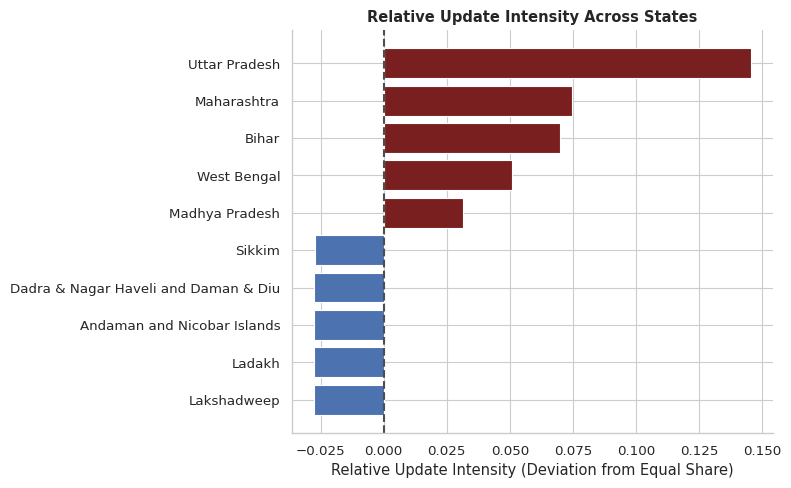

In [ ]:
# Compute state share
rui_df = state_summary.copy()
total_updates = rui_df['total_demo'].sum()
rui_df['state_share'] = rui_df['total_demo'] / total_updates

# Equal share baseline
equal_share = 1 / len(rui_df)

# Relative Update Intensity
rui_df['rui'] = rui_df['state_share'] - equal_share

# Select top & bottom 5
top_bottom = pd.concat([
    rui_df.nlargest(5, 'rui'),
    rui_df.nsmallest(5, 'rui')
]).sort_values('rui')

# Plot
sns.set_theme(style="whitegrid", context="paper", font_scale=1.1)
plt.figure(figsize=(8, 5))
ax = plt.gca()

ax.barh(
    top_bottom['state_clean'],
    top_bottom['rui'],
    color=['#7A1F1F' if x > 0 else '#4C72B0' for x in top_bottom['rui']]
)

ax.axvline(0, linestyle='--', linewidth=1.5, color='#4D4D4D')

ax.set_xlabel('Relative Update Intensity (Deviation from Equal Share)')
ax.set_title('Relative Update Intensity Across States', fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


The Relative Update Intensity analysis highlights states that contribute disproportionately higher or lower shares of demographic updates relative to an equal-share baseline. This reveals behavioral and operational differences that are not apparent from absolute volumes alone, helping identify regions with unusually high update engagement or potential under-utilization of Aadhaar update services.

The equal-share baseline is deliberately conservative. It highlights only those states whose contribution deviates meaningfully from a uniform distribution. The clustering near zero indicates that a small number of large states dominate national update volumes, while most states contribute within a narrow band below the equal-share threshold.

Across temporal and geographic dimensions, Aadhaar demographic updates exhibit episodic national trends, strong adult dominance, stable lifecycle composition across states, and highly concentrated update volumes. Together, these findings indicate that Aadhaar update behavior is driven more by operational and administrative factors than demographic diversity, supporting data-driven capacity planning, lifecycle-aware system optimization, and region-specific interventions.

1️⃣ What is observed (Pattern / Trend / Anomaly)

The Relative Update Intensity analysis shows that a small number of states contribute disproportionately higher shares of Aadhaar demographic updates relative to an equal-share baseline, while most states and Union Territories cluster near or below the baseline. This indicates a highly skewed distribution of update activity across regions.

2️⃣ Why it matters (Insight / Indicator)

Absolute update volumes alone can obscure relative behavioral or operational differences across states. Relative Update Intensity acts as an anomaly indicator, highlighting regions that are significantly more or less active than expected under a uniform distribution.

3️⃣ What it implies (Interpretation)

The observed concentration implies that Aadhaar demographic update activity is not evenly distributed nationwide, but instead driven by a limited set of high-contributing regions. Conversely, lower-intensity regions may reflect differences in accessibility, awareness, or service utilization rather than reduced need.

4️⃣ How decision-making can be supported (Solution Framework)

These findings support a targeted intervention and monitoring framework, where:

High-intensity regions can be prioritized for infrastructure robustness and throughput optimization.

Lower-intensity regions can be flagged for further diagnostic assessment related to outreach effectiveness or service accessibility.

Such differentiation enables region-specific system improvements rather than uniform, one-size-fits-all strategies.

#Executive Summary

Accurate and timely Aadhaar demographic updates are essential for maintaining the integrity, usability, and trustworthiness of India’s digital identity ecosystem. Understanding how demographic update activity varies across time and geography is therefore critical for informed system planning, operational resilience, and service optimization. This study analyzes Aadhaar demographic update activity during March–December 2025 using UIDAI-provided aggregated datasets to identify meaningful patterns, trends, anomalies, and operational indicators relevant to decision-making and system improvement.

The analysis reveals that demographic update activity exhibits strong temporal variability, characterized by episodic peaks and troughs rather than uniform monthly demand. This indicates that update behavior is influenced by time-bound administrative or policy triggers, making historical monthly patterns a valuable indicator for anticipating future operational load. Such volatility underscores the importance of elastic capacity planning rather than static provisioning.

Across all states and Union Territories, demographic updates are found to be overwhelmingly adult-dominated, with adult (17+) updates forming a consistently high share of total activity. The tight clustering of adult update ratios across regions suggests that lifecycle composition is structurally stable nationwide. This highlights that Aadhaar demographic updates are primarily maintenance-driven, reflecting routine corrections and updates by adult residents rather than lifecycle entry events.

Further analysis demonstrates that total update volume and lifecycle composition are weakly coupled. While states vary widely in the number of demographic updates processed, their lifecycle composition remains largely similar. This decoupling implies that higher administrative load does not correspond to different demographic behavior, and that volume-based metrics alone are sufficient for operational scaling decisions.

A relative update intensity assessment shows that demographic update activity is highly concentrated, with a small number of regions contributing disproportionately higher shares of national updates relative to an equal-share baseline. This concentration reveals operational and engagement differences that are not apparent from absolute volumes alone, enabling the identification of regions requiring differentiated monitoring or intervention.

Together, these findings indicate that Aadhaar demographic update behavior is driven more by operational and administrative dynamics than by demographic diversity. The insights support the adoption of temporal readiness planning, lifecycle-aware service optimization, volume-driven capacity allocation, and targeted regional monitoring frameworks. By translating observed patterns into actionable system-level insights, this analysis provides a data-driven foundation to support informed decision-making and continuous improvement within the Aadhaar ecosystem.